<a href="https://colab.research.google.com/github/EischLab/19AMalesHazardRatios/blob/main/19A_Males_Proportional_Hazards_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enclosed below is the Cox Proportional Hazards Regression for the manuscript:

 *Effects of a 33-ion sequential beam galactic cosmic ray analog on male mouse behavior and evaluation of CDDO-EA as a radiation countermeasure*

---



Notes: the hazard function can be interepreted as the risk of dying at time t, and can be attributed to specific variables such as diet or radiation.
The expression is:
h(t)=h0(t)×exp(b1x1+b2x2+...+bpxp)
Where:
* t represents the survival time
* h(t) is the hazard function determined by a set of p covariates a.k.a. main effect variables (x1,x2,...,xp)
* the coefficients (b1,b2,...,bp) measure the impact (i.e., the effect size) of covariates.
* the term h0 is called the baseline hazard. It corresponds to the value of the hazard if all the xi are equal to zero (the quantity exp(0) equals 1). The ‘t’ in h(t) reminds us that the hazard may vary over time.


Hazard ratios are effectively effect sizes
Please note, Exp(Coef((bx)) = Hazard Ratio


In [3]:
pip install lifelines
import pandas as pd

     |████████████████████████████████| 348 kB 31.2 MB/s 
     |████████████████████████████████| 55 kB 2.5 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=9fb5fc564daec039b150a44ba9b4a66eee7322846064ea84705931598e452c9e
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
df = pd.read_csv('/content/gdrive/My Drive/NSRL experiments/NSRL 19A (CDDO)/19A Males Manuscript/Submission 2/Study Materials/NSRL 19A Males Survival.csv')

In [8]:
pd.set_option("display.max_rows", None, "display.max_columns", None) #allows us to see the full data table
print(df)

    Weeks post-IRR  Exclusion  Diet  Radiation
0                2          1     0          0
1                2          1     0          0
2                2          1     0          0
3                3          1     0          0
4                3          1     0          0
5                3          1     0          0
6                3          1     0          0
7               42          0     0          0
8               42          0     0          0
9               42          0     0          0
10              42          0     0          0
11              42          0     0          0
12              42          0     0          0
13              42          0     0          0
14              42          0     0          0
15              42          0     0          0
16              42          0     0          0
17              42          0     0          0
18              42          0     0          0
19              42          0     0          0
20           

<lifelines.CoxPHFitter: fitted with 92 total observations, 50 right-censored observations>
             duration col = 'Weeks post-IRR'
                event col = 'Exclusion'
      baseline estimation = breslow
   number of observations = 92
number of events observed = 42
   partial log-likelihood = -178.64
         time fit was run = 2021-10-07 17:01:09 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
Diet        0.02       1.02       0.31            -0.58             0.63                 0.56                 1.87
Radiation   0.12       1.12       0.31            -0.49             0.72                 0.61                 2.06

             z    p   -log2(p)
covariate                     
Diet      0.07 0.94       0.09
Radiation 0.37 0.71       0.49
---
Concordance = 0.51
Partial AIC = 361.27
log-likelihood ratio test = 0.15 on 2 df
-log2(p) of ll-ratio test = 0.10

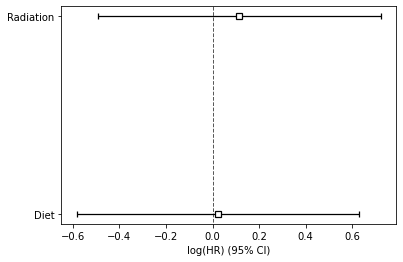

In [9]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(df, duration_col='Weeks post-IRR', event_col='Exclusion')

cph.print_summary()
cph.plot()